In [1]:
from imports import *
from defs import numberop, Sigma_minus, Sigma_plus, Sigma_x, Sigma_y, Sigma_z
from exactDiagMethods import Liouvillian, perform_exact_diag, build_exact_diag_hamiltonian, Enlarge_Matrix_site_j,output_exact_diag_results, Correlation_Matrix_i_Matrix_j
from globalMethods import verify_density_matrix, build_initial_states
from vqteMethods import hamiltonian_generation_simple, hamiltonian_generation, perform_vqte

In [2]:

def main():
    # Initialize the simulation parameters
    N=1
    gamma=0.05
    eps=1
    mu_L=2
    print("yeah")
    mu_R=0.1
    T_L = 2
    T_R= 10
    beta_L=1/T_L
    beta_R=1/T_R
    F_L = 1/(np.exp(beta_L*(eps-mu_L))+1)
    F_R = 1/(np.exp(beta_R*(eps-mu_R))+1)

    time = 100.0
    dt = 0.1
    nt = int(time/dt)

    ham_real, ham_imag = hamiltonian_generation(eps, gamma, mu_L, T_L)
    vqte_init_state, exact_diag_init_state, ansatz, init_param_values = build_initial_states(ham_real)
    exact_diag_ham = build_exact_diag_hamiltonian(eps)

    print(vqte_init_state)
    print(exact_diag_init_state)

    # Perform exact diagonalization
    exact_diag_results, time_points, steadyState = perform_exact_diag(gamma, F_L, F_R, dt, nt, exact_diag_init_state,exact_diag_ham,N)

    # Perform VQTE simulation
    #vqte_results, trace_list = perform_vqte(ham_real, ham_imag, vqte_init_state, mu_L,mu_R, T_L, T_R, dt, nt, ansatz, init_param_values)
    #Example VQE
    # Output results
    output_exact_diag_results(exact_diag_results, time, nt, eps, mu_L,mu_R,T_L, T_R, time_points, steadyState)
    #output_results(vqte_results, exact_diag_results, time, nt, eps, mu_L,mu_R,T_L, T_R, time_points, trace_list)

yeah
Statevector([ 1.0000000e+00+4.89858720e-16j,
             -1.2246468e-16-2.99951957e-32j,
             -2.4492936e-16-2.99951957e-32j,
             -1.2246468e-16+2.99951957e-32j],
            dims=(2, 2))
[[ 1.0000000e+00+4.89858720e-16j -2.4492936e-16-2.99951957e-32j]
 [-1.2246468e-16-2.99951957e-32j -1.2246468e-16+2.99951957e-32j]]
Reference number operator expectation value: (0.4500127467949729+0j)
Is Hermitian: True
Trace: (0.9999999999999999+4.898587196589413e-16j) (should be 1)
Eigenvalues: [-1.2246468e-16  1.0000000e+00]
All eigenvalues ≥ 0: False
Purity (Tr(ρ²)): (1+9.797174393178826e-16j) (should be 1 for pure state)
Initial expectation value of number operator: (-1.224646799147353e-16+8.998558695971146e-32j)


C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\tessa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


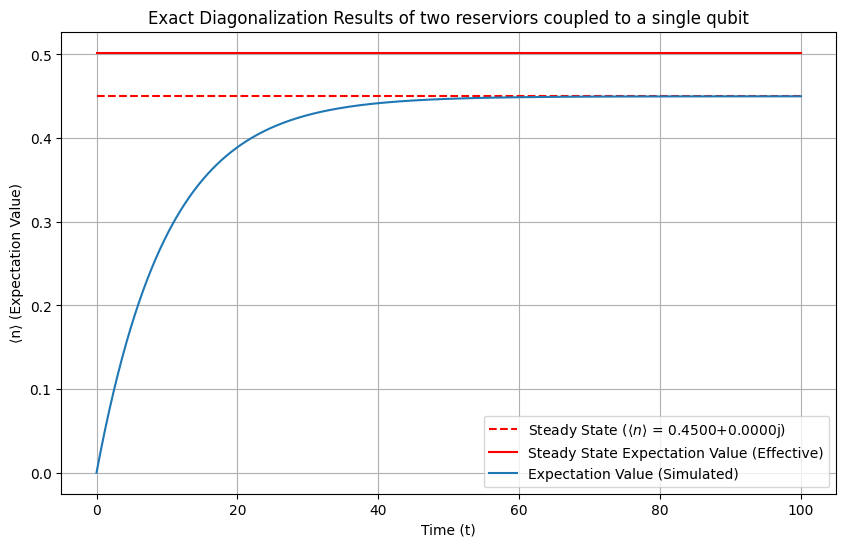

In [3]:
main()